<a href="https://colab.research.google.com/github/subinmun1997/Kakao_chatbot/blob/master/Keras_%26_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 460kB 35.1MB/s 
     |████████████████████████████████| 92kB 7.1MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
!pip install selenium

     |████████████████████████████████| 911kB 11.4MB/s 


Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 1.3288 - accuracy: 0.5723 - val_loss: 0.3918 - val_accuracy: 0.8844
Epoch 2/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8909 - val_loss: 0.3147 - val_accuracy: 0.9076
Epoch 3/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.9113 - val_loss: 0.2829 - val_accuracy: 0.9187
Epoch 4/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9171 - val_loss: 0.2602 - val_accuracy: 0.9231
Epoch 5/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2513 - accuracy: 0.9259 - val_loss: 0.2408 - val_accuracy: 0.9292
Epoch 6/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2288 - accuracy: 0.9314 - val_loss: 0.2216 - val_accuracy: 0.9349
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2135 - accuracy: 0.9379 - val_loss: 0.2075 - val_accuracy:

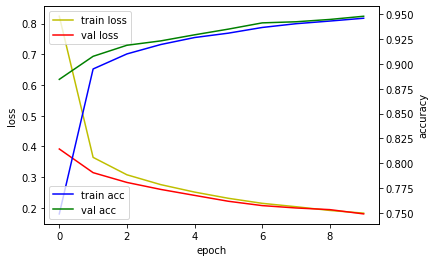

In [3]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0 

# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1819 - accuracy: 0.9464


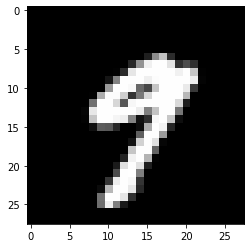

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()

In [10]:
# 필요한 모듈 임포트
import pandas as pd
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate

# 데이터 읽어오기
train_file = "./chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

MAX_SEQ_LEN = 15 # 단어 시퀀스 벡터 크기
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

# 학습용, 검증용, 테스트용 데이터셋 생성
# 학습셋:검증셋:테스트셋 = 7:2:1
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))

train_size = int(len(padded_seqs) * 0.7)
val_size = int(len(padded_seqs) * 0.2)
test_size = int(len(padded_seqs) * 0.1)

train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).take(val_size).batch(20)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)

# 하이퍼파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(word_index) + 1 # 전체 단어 수

# CNN 모델 정의
input_layer = Input(shape=(MAX_SEQ_LEN,))
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

# 3,4,5-gram 이후 합치기
concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(3, name='logits')(dropout_hidden)
predictions = Dense(3, activation=tf.nn.softmax)(logits)

# 모델 생성
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 학습
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

# 모델 평가(테스트 데이터셋 이용)
loss, accuracy = model.evaluate(test_ds, verbose=1)
print('Accuracy: %f' %(accuracy*100))
print('loss: %f' %(loss))


model.save('cnn_model.h5')

Epoch 1/5
414/414 [==============================] - 13s 28ms/step - loss: 0.9817 - accuracy: 0.5164 - val_loss: 0.6094 - val_accuracy: 0.7830
Epoch 2/5
414/414 [==============================] - 12s 28ms/step - loss: 0.5917 - accuracy: 0.7639 - val_loss: 0.2859 - val_accuracy: 0.9146
Epoch 3/5
414/414 [==============================] - 11s 28ms/step - loss: 0.3119 - accuracy: 0.8939 - val_loss: 0.1430 - val_accuracy: 0.9505
Epoch 4/5
414/414 [==============================] - 11s 28ms/step - loss: 0.1897 - accuracy: 0.9410 - val_loss: 0.1003 - val_accuracy: 0.9679
Epoch 5/5
60/60 [==============================] - 0s 3ms/step - loss: 0.0714 - accuracy: 0.9839
Accuracy: 98.392552
loss: 0.071352


In [11]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import preprocessing

# 데이터 읽어오기
train_file = "./chatbot_data.csv"
data = pd.read_csv(train_file, delimiter=',')
features = data['Q'].tolist()
labels = data['label'].tolist()

# 단어 인덱스 시퀀스 벡터
corpus = [preprocessing.text.text_to_word_sequence(text) for text in features]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)

MAX_SEQ_LEN = 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQ_LEN, padding='post')

# 테스트용 데이터셋 생성
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, labels))
ds = ds.shuffle(len(features))
test_ds = ds.take(2000).batch(20)

# 감정 분류 CNN 모델 불러오기
model = load_model('cnn_model.h5')
model.summary()
model.evaluate(test_ds, verbose=2)

# 테스트용 데이터셋의 10212번째 데이터 출력
print("단어 시퀀스 : ", corpus[10212])
print("단어 인덱스 시퀀스 : ", padded_seqs[10212])
print("문장 분류(정답) : ", labels[10212])

# 테스트용 데이터셋의 10212번째 데이터 감정 예측
picks = [10212]
predict = model.predict(padded_seqs[picks])
predict_class = tf.math.argmax(predict, axis=1)
print("감정 예측 점수 : ",predict)
print("감정 예측 클래스 :", predict_class.numpy())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 15, 128)      1715072     input_3[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 15, 128)      0           embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 13, 128)      49280       dropout_2[0][0]                  
______________________________________________________________________________________________